<b>¡Hola Andres!</b>

Mi nombre es Alejandro Abia y tengo el gusto de revisar tu proyecto.

A continuación, encontrarás mis comentarios en celdas pintadas de tres colores (verde, amarillo y rojo), a manera de semáforo. Por favor, <b>no las borres ni muevas de posición</b> mientras dure el proceso de revisión.

<div class="alert alert-block alert-success">
<b>Éxito</b> <a class="tocSkip"></a>
En celdas verdes encontrarás comentarios en relación a tus aciertos y fortalezas.
</div>
<div class="alert alert-block alert-warning">
<b>Antención</b> <a class="tocSkip"></a>
Utilizaré el color amarillo para llamar tu atención, expresar algo importante o compartirte alguna idea de valor.
</div>
<div class="alert alert-block alert-danger">
<b>A resolver</b> <a class="tocSkip"></a>
En rojo emitiré aquellos puntos que deberás atender para aprobar la revisión.
</div>
<div class="alert alert-block alert-info">
<b>Comentario estudiante</b><a class="tocSkip"></a>
Es factible que, a lo largo del proceso de revisión, quieras dejarme comentarios. Si es el caso, por favor realízalo dentro de celdas azules como esta.
</div>
Respecto del proceso de revisión, tu proyecto será aceptado una vez que los comentarios en rojo hayan sido atendidos.
¡Empecemos!

# Paso 1. Carga de librerias y exploración inicial de datos.

<div class="alert alert-block alert-success"> <b>Celda [134]</b> <a class="tocSkip"></a> La corrección del delimitador del CSV usando `sep="\t"` es un buen manejo de inconsistencias en los datos de entrada. Esto previno errores en la carga del DataFrame. </div> 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats as st

In [3]:
#Cargamos los datos como DF.
data= pd.read_csv('/datasets/logs_exp_us.csv')

In [4]:
#Realizamos la exploraciòn inicial de los datos.

data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244126 entries, 0 to 244125
Data columns (total 1 columns):
 #   Column                                       Non-Null Count   Dtype 
---  ------                                       --------------   ----- 
 0   EventName	DeviceIDHash	EventTimestamp	ExpId  244126 non-null  object
dtypes: object(1)
memory usage: 1.9+ MB


,EventName\tDeviceIDHash\tEventTimestamp\tExpId
0,MainScreenAppear\t4575588528974610257\t1564029...
1,MainScreenAppear\t7416695313311560658\t1564053...
2,PaymentScreenSuccessful\t3518123091307005509\t...
3,CartScreenAppear\t3518123091307005509\t1564054...
4,PaymentScreenSuccessful\t6217807653094995999\t...


Como primera observación detectamos que el archivo csv, no se encuentran los datos separados por coma estándard, por lo que procesaremos el archvivo con \t como separador.

In [5]:
data = pd.read_csv('/datasets/logs_exp_us.csv',sep="\t")
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244126 entries, 0 to 244125
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   EventName       244126 non-null  object
 1   DeviceIDHash    244126 non-null  int64 
 2   EventTimestamp  244126 non-null  int64 
 3   ExpId           244126 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 7.5+ MB


,EventName,DeviceIDHash,EventTimestamp,ExpId
0,MainScreenAppear,4575588528974610257,1564029816,246
1,MainScreenAppear,7416695313311560658,1564053102,246
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248
3,CartScreenAppear,3518123091307005509,1564054127,248
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248


Por lo que podemos observar, pareciera que no tenemos datos ausentes. Cabe mencionar que la columna de TimesStamp se encuentra en int64 por lo que habrá que determinar como convertirlo a un formato correcto y trabajable para lo que queremos obtener.

# 2 Optimización de datos

In [6]:
#Como buena práctica renombramos las columnas a minúsculas en los Df que lo requieren.

data_columns = {
    "EventName":"event",
    "DeviceIDHash":"user",
    "EventTimestamp":"time",
    "ExpId":"group",
}

data.rename(columns = data_columns, inplace= True)
print(data.columns)

Index(['event', 'user', 'time', 'group'], dtype='object')


<div class="alert alert-block alert-success"> <b>Celda [135]</b> <a class="tocSkip"></a> La renombración de columnas usando un diccionario mejora la legibilidad del DataFrame. Buen uso de `rename()` para mantener consistencia en los nombres. </div> 

In [7]:
#Procedemos a agregar una columna de datetime convirtiendo los datos de time con el metodo to_datetime para obtener fechas. (Identificar como proceder este paso tuve que consultarlo en internet asì como con las clases de mi tutor que ayudaron bastante)

data['datetime'] = pd.to_datetime(data['time'], unit='s')

In [8]:
#Procedemos a agregar una columna con fecha calculadas desde la columna recien agregada de datetime.
data['date'] = data['datetime'].dt.floor('1D')

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244126 entries, 0 to 244125
Data columns (total 6 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   event     244126 non-null  object        
 1   user      244126 non-null  int64         
 2   time      244126 non-null  int64         
 3   group     244126 non-null  int64         
 4   datetime  244126 non-null  datetime64[ns]
 5   date      244126 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(3), object(1)
memory usage: 11.2+ MB


DROP DUPLICATES??

# 3 Estudio y comprobación de datos

In [10]:
#Calculamos el número de eventos en los registros.
len(data['event'])

244126

In [11]:
#Calculamos el número de usuarios en los registros.
data['user'].nunique()

7551

In [12]:
#Obtenemos el promedio de eventos por usuario con el método len.

len(data)/data['user'].nunique()

32.33028737915508

In [13]:
#Obtenemos las fechas minimas y máximas de nuestros datos.
data['date'].min()

Timestamp('2019-07-25 00:00:00')

In [14]:
data['date'].max()

Timestamp('2019-08-07 00:00:00')

<AxesSubplot:>

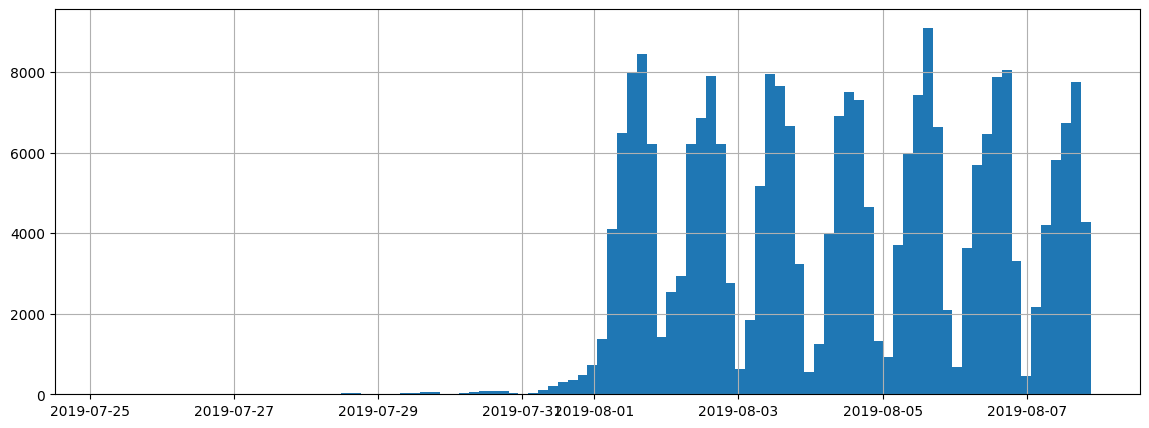

In [15]:
#Graficamos un histograma por fecha y hora.
data['datetime'].hist(bins=100, figsize=(14,5))

Como algo a notar es que podemos visualizar con el histograma que si bien tenemos registros que comienzan con nuestra fecha minima el 25 de julio y que abarcan 13 dias hasta el 07 de agosto en realidad los datos más notables, y probablemente aquellos con sufienciente información para hacer cálculos abarcarian apartir del 31 de julio o 01 de agosto.

<AxesSubplot:xlabel='date'>

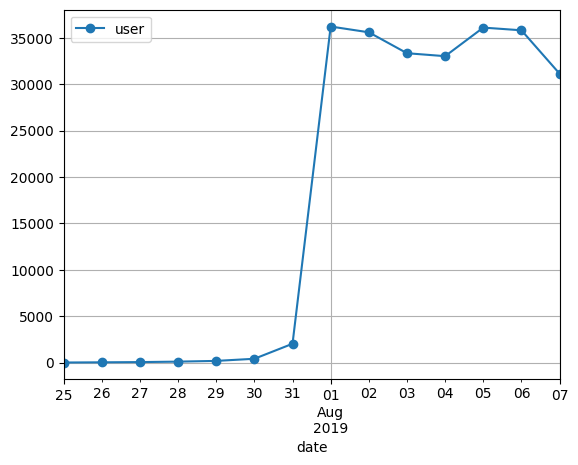

In [16]:
#Para confirmar nuestras propuestas de acuerdo a lo detectado visualmente, obtenemos el numero de usuarios por fecha para determinar con precisión donde es conveniente hacer nuestro corte de datos.
data.pivot_table(index='date',values='user', aggfunc='count').plot(style='o-', grid=True)

Hemos confirmado que a partir del 01 de agosto fue cuando se dieron màs registros de eventos por lo que sería conveniente hacer el análisis a partir de la fecha detectada.

In [17]:
#Aseguramos que nuestra columna esté en el tipo de datos correcto.(Este paso lo quise hacer con el método query pero no me funcionó por lo que se hizo el filtrado booleano)
data_clean = data[data['datetime'] >= "2019-08-01"]

<div class="alert alert-block alert-success"> <b>Celda [146]</b> <a class="tocSkip"></a> El filtrado booleano es correcto. </div>

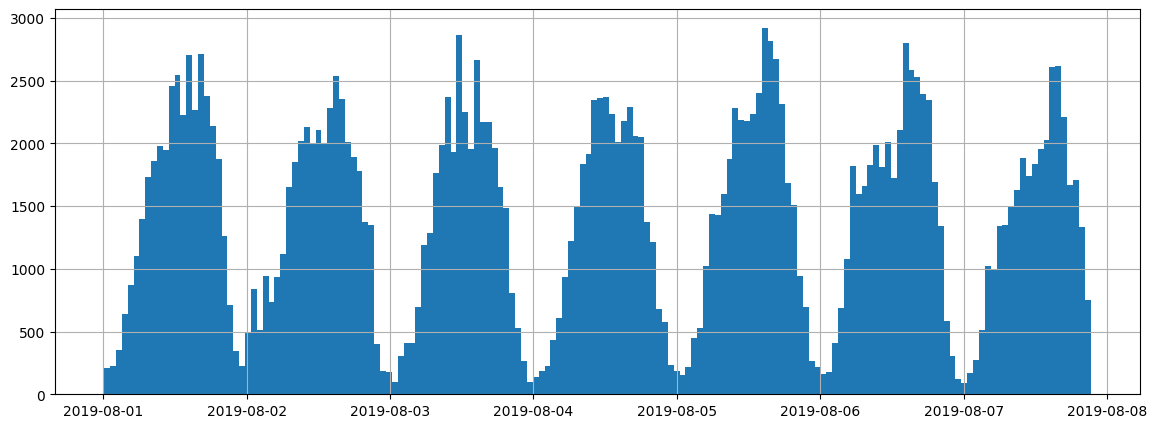

In [18]:
#Graficamos en histograma el corte de usuarios que sí nos interesan.
data_clean['datetime'].hist(bins=7*24, figsize=(14,5))
plt.show()

In [19]:
#Comprobamos que efectivamente en nuestro slice existen usuarios de los 3 grupos que estamos estudiando.
data_clean['group'].unique()

array([246, 247, 248])

Ahora con un slice de datos más limpios en términos de la fecha, procedemos a recalcular algunas de las métricas.

In [20]:
#Recalculamos la cantidad de eventos
total_event_clean = len(data_clean['event'])
print(total_event_clean)

241298


In [21]:
#Calculamos el número de usuarios en los registros.
users_clean = len(data_clean['user'].unique())
print(users_clean)

7534


In [22]:
#Obtenemos el promedio de eventos por usuario con el método len.
eventos_per_user = total_event_clean/users_clean
print(eventos_per_user)

32.02787363950093


# 4 Estudio de embudo

In [23]:
#Obtenemos los tipos de eventos en los registros.
list(data_clean['event'].unique())

['Tutorial',
 'MainScreenAppear',
 'OffersScreenAppear',
 'CartScreenAppear',
 'PaymentScreenSuccessful']

<div class="alert alert-block alert-success"> <b>Celda [152]</b> <a class="tocSkip"></a> El análisis de conversión por evento es sólido y bien estructurado. La lógica de cálculo de conversión en cada etapa está bien aplicada. </div> <div class="alert alert-block alert-warning"> <b>Celda [156]</b> <a class="tocSkip"></a> El cálculo de conversión por etapa es correcto, pero podrías optimizar la asignación de `event_conversion` usando `shift()` en lugar de un bucle. Ejemplo: 
    
    user_counts['event_conversion'] = user_counts['unique_users'].div(user_counts['unique_users'].shift()) 
    
Esto haría el código más eficiente. </div>

In [24]:
#Obtenemos la frecuencia de cada suceso.

event_counts = data_clean['event'].value_counts()
print(event_counts)

MainScreenAppear           117431
OffersScreenAppear          46350
CartScreenAppear            42365
PaymentScreenSuccessful     34113
Tutorial                     1039
Name: event, dtype: int64


In [25]:
#Obtenemos la cantidad de usuarios que realizaron cada una de las acciones.

user_counts = data_clean.groupby('event')['user'].nunique().reset_index()
user_counts.columns = ['event', 'unique_users']
user_counts = user_counts.sort_values(by='unique_users', ascending=False)
print(user_counts)


                     event  unique_users
1         MainScreenAppear          7419
2       OffersScreenAppear          4593
0         CartScreenAppear          3734
3  PaymentScreenSuccessful          3539
4                 Tutorial           840


In [26]:
#Sobre la tabal de user_counts agregamos una columna que muestra la proporción de usuarios que realizó cada acciòn.
user_counts['total_conversion'] = (user_counts['unique_users'] / 7534) * 100
print(user_counts)

                     event  unique_users  total_conversion
1         MainScreenAppear          7419         98.473586
2       OffersScreenAppear          4593         60.963632
0         CartScreenAppear          3734         49.561986
3  PaymentScreenSuccessful          3539         46.973719
4                 Tutorial           840         11.149456


In [27]:
#Procedemos a calcular la conversión por etapa. (Este paso tuve que consultar para poder hacerme una pequeña función que ayudara con la tarea en lugar de hacerlo manual)

event_conversion = [None]

# Recorremos las filas calculando la conversión:

for row in range(1, len(user_counts)):  
    prev_users = user_counts.iloc[row - 1]['unique_users']
    current_users = user_counts.iloc[row]['unique_users']
    event_conversion.append((current_users / prev_users) * 100)

# Agregamos la columna al DataFrame
user_counts['event_conversion'] = event_conversion

print(user_counts)


                     event  unique_users  total_conversion  event_conversion
1         MainScreenAppear          7419         98.473586               NaN
2       OffersScreenAppear          4593         60.963632         61.908613
0         CartScreenAppear          3734         49.561986         81.297627
3  PaymentScreenSuccessful          3539         46.973719         94.777718
4                 Tutorial           840         11.149456         23.735519


Considerando que de nuestra columna de event_conversion el Nan en realidad representa el 100%, podemos indicar que, excluyendo el tutorial,  de la pantalla principal a la pantalla de ofertas es donde hay más pérdida de usuarios por una conversión de solo el 38.1% de los usuarios mientras que el resto de las conversiones son mejor de 81%, 94%. Por lo que podemos calcular, el 46.97 % de los usuarios hace el viaje completo del embudo.

# 5 Estudio del experimento

In [28]:
#Procedemos a calcular cuantos usuarios hay en cada grupo de los experimentos.

users_per_exp_group = data_clean.pivot_table(index='group',values='user', aggfunc='nunique')['user']
print(users_per_exp_group)

group
246    2484
247    2513
248    2537
Name: user, dtype: int64


In [29]:
import scipy.stats as stats

# Filtramos cada grupo
group_a = data_clean[data_clean['group'] == 246] 
group_aa = data_clean[data_clean['group'] == 247]

# Contamos el número de eventos por usuario en cada grupo (Este descubrí que para el mann-whitney habia que convertir a valores numericos para que funcione)
events_per_user_a = group_a.groupby('user')['event'].count()
events_per_user_aa = group_aa.groupby('user')['event'].count()

# Prueba de Mann-Whitney
stat, p_value = stats.mannwhitneyu(events_per_user_a, events_per_user_aa)

print(f"Prueba de Mann-Whitney para muestras A: U = {stat:.3f}, p-valor = {p_value:.5f}")


Prueba de Mann-Whitney para muestras A: U = 3129241.000, p-valor = 0.87384


<div class="alert alert-block alert-success"> <b>Celda [158]</b> <a class="tocSkip"></a> La prueba de Mann-Whitney es adecuada para comparar los grupos A/A. Buen manejo de la distribución de eventos por usuario. </div> <div class="alert alert-block alert-success"> <b>Celda [159]</b> <a class="tocSkip"></a> El cálculo de usuarios por evento es correcto, pero los valores en `users_per_group_per_event` pueden incluir duplicados si un usuario interactúa varias veces. Se recomienda: 

    users_per_group_per_event = data_clean.groupby(['group', 'event'])['user'].nunique().unstack()

Esto evita contar usuarios más de una vez por evento. </div> <div class="alert alert-block alert-warning"> <b>Celda [161]</b> <a class="tocSkip"></a> La función `mann_whitney_by_event()` es correcta, pero podrías evitar la iteración y aplicar `groupby()` directamente para optimizar el rendimiento. </div>

Por lo que hemos determinado, en términos de la cantidad de eventos por usuario en ambos grupos A/A no existe una diferencia estadística significativa lo cual es positivo por que sugiere que nuestros sistema de control de separaciòn de usuarios para la generaciòn de muestras es correcto, por lo que los resultados pueden ser comparables. 

In [30]:
#Para continuar con nuestros análisis determinaremos cual es el evento con mayor frecuencia de cada grupo.

users_per_group_per_event = data_clean.pivot_table(index='event', values='user', columns='group', aggfunc='nunique')
users_per_group_per_event

group,246,247,248
event,,,
CartScreenAppear,1266,1238,1230
MainScreenAppear,2450,2476,2493
OffersScreenAppear,1542,1520,1531
PaymentScreenSuccessful,1200,1158,1181
Tutorial,278,283,279


<div class="alert alert-block alert-info">
<b>Las partes que siguen me requeririeron mucho tiempo y mucha iteración, prueba-error, y consultar fuentes externas ya que era común generar errores. Sobre todo la función fue muuy retador pero creo llegué al final a algo funcional </b> <a class=“tocSkip”></a>
</div>

<div class="alert alert-block alert-success"> <b>Comentario general</b> <a class="tocSkip"></a> Andrés, es genial que reconocieras los desafíos al construir tu función. En ciencia de datos, la iteración, el prueba-error y la consulta de fuentes externas son parte del proceso de aprendizaje y desarrollo. Tu función `mann_whitney_by_event()` cumple su propósito. Tal vez puedo sugerir algunas optimizaciones para mejorar su eficiencia y claridad. 
Optimización de mann_whitney_by_event()
1️⃣ Evitar la iteración manual con groupby().apply()
En lugar de recorrer manualmente los eventos con un for, puedes usar groupby().apply() para aplicar la prueba de Mann-Whitney en una sola operación.

Código original (uso de for-loop):

    def mann_whitney_by_event(df, group_col, event_col, group1, group2):
        unique_events = df[event_col].unique()
        results = []

        for event in unique_events:
            group1_data = df[(df[group_col] == group1) & (df[event_col] == event)]
            group2_data = df[(df[group_col] == group2) & (df[event_col] == event)]

            n1, n2 = len(group1_data), len(group2_data)

            if n1 > 0 and n2 > 0:  # Verificamos que ambos grupos tengan datos
                stat, p_value = stats.mannwhitneyu(group1_data['user'], group2_data['user'])
                results.append([event, stat, p_value])

        return pd.DataFrame(results, columns=['event', 'U_statistic', 'p_value'])

Código optimizado (uso de groupby().apply()):

    def mann_whitney_by_event_optimized(df, group_col, event_col, group1, group2):
        # Filtramos solo los datos de los grupos a comparar
        df_filtered = df[df[group_col].isin([group1, group2])]

        # Aplicamos la prueba por cada evento
        def mann_whitney_test(sub_df):
            group1_data = sub_df[sub_df[group_col] == group1]['user']
            group2_data = sub_df[sub_df[group_col] == group2]['user']

            if len(group1_data) > 0 and len(group2_data) > 0:
                stat, p_value = stats.mannwhitneyu(group1_data, group2_data)
                return pd.Series({'U_statistic': stat, 'p_value': p_value})
            else:
                return pd.Series({'U_statistic': None, 'p_value': None})

        return df_filtered.groupby(event_col).apply(mann_whitney_test).reset_index()
</div>


In [31]:
#Hemos determinado que el evento con más frecuencias es el MainScreenAppear, por lo que corremos la prueba de mann whitney para comprobar diferencias:

import scipy.stats as stats

# Filtramos para MainScreenAppear
group_a_main = data_clean[(data_clean['group'] == 246) & (data_clean['event'] == "MainScreenAppear")]
group_aa_main = data_clean[(data_clean['group'] == 247) & (data_clean['event'] == "MainScreenAppear")]

# Extraer la cantidad de veces que aparece el evento por usuario
events_a = group_a_main['user'].value_counts()
events_aa = group_aa_main['user'].value_counts()

# Prueba de Mann-Whitney U
stat, p_value = stats.mannwhitneyu(events_a, events_aa)

print(f"Prueba de Mann-Whitney para 'MainScreenAppear': U = {stat:.3f}, p-valor = {p_value:.5f}")


Prueba de Mann-Whitney para 'MainScreenAppear': U = 3011023.000, p-valor = 0.65800


Nuevamente observamos que de acuerdo a nuestra prueba ambos grupos A/A obtenien un valor por arriba de .50 que es el estándard que hemos fijado como aceptable para nuestro nivel de significacia.

In [32]:
import scipy.stats as stats

def mann_whitney_by_event(df, group_col, event_col, group1, group2):

    unique_events = df[event_col].unique()
    results = []

    for event in unique_events:
        group1_data = df[(df[group_col] == group1) & (df[event_col] == event)]
        group2_data = df[(df[group_col] == group2) & (df[event_col] == event)]

        # Extraemos el tamaño de cada grupo (esta parte la consulte por que estaba muy complejo)
        n1, n2 = len(group1_data), len(group2_data)

        if n1 > 0 and n2 > 0:  # Verificamos que ambos grupos tengan datos
            stat, p_value = stats.mannwhitneyu(group1_data['user'], group2_data['user'])
            results.append([event, stat, p_value])
    
    # Convertimos los resultados en un DataFrame
    results_df = pd.DataFrame(results, columns=['event', 'U_statistic', 'p_value'])
    
    return results_df

# Aplicamos la función a los grupos 246 y 247
results_df = mann_whitney_by_event(data_clean, 'group', 'event', 246, 247)
print(results_df)


                     event  U_statistic       p_value
0                 Tutorial      55521.0  9.595039e-01
1         MainScreenAppear  723716297.0  6.022866e-06
2       OffersScreenAppear  105496899.0  6.650731e-19
3         CartScreenAppear   88677264.0  4.896070e-06
4  PaymentScreenSuccessful   58459504.0  3.992385e-03


<div class="alert alert-block alert-warning"> <b>Celda [161]</b> <a class="tocSkip"></a> Andrés, la prueba de Mann-Whitney U es adecuada cuando comparamos distribuciones en datos no paramétricos, pero en este caso estás comparando proporciones de conversión entre grupos. Para este tipo de análisis, una **prueba Z para proporciones** puede ser apropiada, ya que evalúa diferencias en tasas de éxito entre grupos.

Podrías implementar la prueba Z de la siguiente manera:

    from statsmodels.stats.proportion import proportions_ztest

    # Usuarios que completaron el evento en cada grupo
    success_a = data_clean[data_clean['group'] == 246]['event'].value_counts().get('PaymentScreenSuccessful', 0)
    success_b = data_clean[data_clean['group'] == 248]['event'].value_counts().get('PaymentScreenSuccessful', 0)

    # Total de usuarios en cada grupo
    n_a = data_clean[data_clean['group'] == 246]['user'].nunique()
    n_b = data_clean[data_clean['group'] == 248]['user'].nunique()

    # Prueba Z
    stat, p_value = proportions_ztest([success_a, success_b], [n_a, n_b])
    print(f"Prueba Z para proporciones: Z = {stat:.3f}, p-valor = {p_value:.5f}")

Esto te permitirá evaluar si la diferencia en tasas de conversión entre grupos es estadísticamente significativa con un método más adecuado para proporciones. ¡Pruébalo y revisa si los resultados cambian!

</div>

In [33]:
# Convertimos nuestros resultados a un formato más interpretable en función de nuestras pruebas anteriores:
results_df['p_value'] = results_df['p_value'].apply(lambda x: f"{x:.5f}")

# Para ver los resultados con el formato deseado:
print(results_df)


                     event  U_statistic  p_value
0                 Tutorial      55521.0  0.95950
1         MainScreenAppear  723716297.0  0.00001
2       OffersScreenAppear  105496899.0  0.00000
3         CartScreenAppear   88677264.0  0.00000
4  PaymentScreenSuccessful   58459504.0  0.00399


Hemos detectado que existe diferencia estadísticamente significativa entre ambos grupos A/A por lo que sería recomendable verificar por qué está sucediendo esto. Por lo pronto, dado que tenemos dos muestras A, procedemos a comparar ambas con las del grupo de experimento.

In [34]:
#Prueba A/B 246 y 248
results_ab = mann_whitney_by_event(data_clean, 'group', 'event', 246, 248)
print(results_ab)

                     event  U_statistic       p_value
0                 Tutorial      59976.0  9.207896e-01
1         MainScreenAppear  767394308.0  5.431559e-01
2       OffersScreenAppear  113640729.0  5.123165e-21
3         CartScreenAppear  107524364.0  1.110235e-08
4  PaymentScreenSuccessful   69867392.0  2.324038e-06


In [35]:
# Convertimos nuestros resultados a un formato más interpretable en función de nuestras pruebas anteriores:
results_ab['p_value'] = results_ab['p_value'].apply(lambda x: f"{x:.5f}")

# Para ver los resultados con el formato deseado:
print(results_df)

                     event  U_statistic  p_value
0                 Tutorial      55521.0  0.95950
1         MainScreenAppear  723716297.0  0.00001
2       OffersScreenAppear  105496899.0  0.00000
3         CartScreenAppear   88677264.0  0.00000
4  PaymentScreenSuccessful   58459504.0  0.00399


In [36]:
#Prueba AA/B 247 Y 248
results_aab = mann_whitney_by_event(data_clean, 'group', 'event', 247, 248)
print(results_aab)

                     event  U_statistic       p_value
0                 Tutorial      63776.0  9.443386e-01
1         MainScreenAppear  811488468.0  1.021045e-07
2       OffersScreenAppear  124104856.0  6.657754e-01
3         CartScreenAppear   93298186.0  4.021823e-02
4  PaymentScreenSuccessful   59534684.0  1.317657e-03


In [37]:
# Convertimos nuestros resultados a un formato más interpretable en función de nuestras pruebas anteriores:
results_aab['p_value'] = results_aab['p_value'].apply(lambda x: f"{x:.5f}")

# Para ver los resultados con el formato deseado:
print(results_aab)

                     event  U_statistic  p_value
0                 Tutorial      63776.0  0.94434
1         MainScreenAppear  811488468.0  0.00000
2       OffersScreenAppear  124104856.0  0.66578
3         CartScreenAppear   93298186.0  0.04022
4  PaymentScreenSuccessful   59534684.0  0.00132


Hemos detectado que los dos grupos de control arrojan resultados distintos en la diferencia estadística en comparación con el grupo experimental por lo que sugiere que quizá no hubo una correcta segmentación o algo que habría que revisarse. Ante la situación procedemos a combinar ambos grupos A para luego comparar ese grupo combinado con el grupo de experimento B.

<div class="alert alert-block alert-info">
<b>Aquí me metí a más rollo X_x porque mi función original nomás no funcionaba para combinar los datos, por lo que con muchìsima prueba y error y consulta, se modifica para crear una que funcionara </b> <a class=“tocSkip”></a>
</div>

<div class="alert alert-block alert-success"> <b>Comentario general</b> <a class="tocSkip"></a> Andrés, es completamente normal encontrarse con dificultades al manejar estructuras de datos y pruebas estadísticas. Lo importante es que lograste resolver el problema con persistencia y consulta de recursos externos. ¡Eso es lo que hace un buen analista de datos!
Dicho esto, revisé la función que implementaste para combinar los grupos A/A y compararlos con el grupo experimental. Es funcional. Tal vez haya otra manera, quzá más eficiente, de estructurar el código para evitar bucles y ganar claridad.

Código original (uso de isin() y bucles manuales):
    
    def mann_whitney_by_event(df, group_col, event_col, group1, group2):
    unique_events = df[event_col].unique()
    results = []

    # Aqui se combinan los dos grupos
    group1_data = df[df[group_col].isin(group1)]
    group2_data = df[df[group_col] == group2]

    for event in unique_events:
        group1_event_data = group1_data[group1_data[event_col] == event]
        group2_event_data = group2_data[group2_data[event_col] == event]

        # Extraemos el tamaño de cada grupo
        n1, n2 = len(group1_event_data), len(group2_event_data)

        if n1 > 0 and n2 > 0:  # Verificamos que ambos grupos tengan datos
            stat, p_value = stats.mannwhitneyu(group1_event_data['user'], group2_event_data['user'])
            results.append([event, stat, p_value])

    # Convertimos los resultados en un DataFrame
    return pd.DataFrame(results, columns=['event', 'U_statistic', 'p_value'])

Código optimizado (uso de groupby().apply() y mejor filtrado):    
    
    def mann_whitney_by_event_optimized(df, group_col, event_col, group1_list, group2):
        df_filtered = df[df[group_col].isin(group1_list + [group2])]

        def mann_whitney_test(sub_df):
            group1_data = sub_df[sub_df[group_col].isin(group1_list)]['user']
            group2_data = sub_df[sub_df[group_col] == group2]['user']

            if len(group1_data) > 0 and len(group2_data) > 0:
                stat, p_value = stats.mannwhitneyu(group1_data, group2_data)
                return pd.Series({'U_statistic': stat, 'p_value': p_value})
            else:
                return pd.Series({'U_statistic': None, 'p_value': None})

        return df_filtered.groupby(event_col).apply(mann_whitney_test).reset_index()

¿Qué mejoras aporta esta optimización?
    
✅ Elimina bucles innecesarios: groupby().apply() realiza la prueba para cada evento sin recorrer manualmente la lista.
✅ Mejor combinación de grupos: En lugar de manejar group1 como una lista separada y luego filtrarla manualmente, se agrupan los datos más eficientemente.
✅ Mayor claridad y legibilidad: La estructura del código es más limpia y fácil de entender.
</div>

In [38]:
def mann_whitney_by_event(df, group_col, event_col, group1, group2):
    unique_events = df[event_col].unique()
    results = []
    
    # Aqui se combinan los dos grupos
    group1_data = df[df[group_col].isin(group1)]
    group2_data = df[df[group_col] == group2]

    for event in unique_events:
        group1_event_data = group1_data[group1_data[event_col] == event]
        group2_event_data = group2_data[group2_data[event_col] == event]

        # Extraemos el tamaño de cada grupo
        n1, n2 = len(group1_event_data), len(group2_event_data)

        if n1 > 0 and n2 > 0:  # Verificamos que ambos grupos tengan datos
            stat, p_value = stats.mannwhitneyu(group1_event_data['user'], group2_event_data['user'])
            results.append([event, stat, p_value])
    
    # Convertimos los resultados en un DataFrame
    results_df = pd.DataFrame(results, columns=['event', 'U_statistic', 'p_value'])
    
    return results_df

# Definimos los grupos que vamos a comparar combinando los dos de A
group_combined = [246, 247]
group_to_compare = 248

# Aplicamos la función a los grupos combinados 246 y 247, con 248
results_aaab = mann_whitney_by_event(data_clean, 'group', 'event', group_combined, group_to_compare)
print(results_aaab)

                     event   U_statistic       p_value
0                 Tutorial  1.237520e+05  9.216228e-01
1         MainScreenAppear  1.578883e+09  5.060381e-04
2       OffersScreenAppear  2.377456e+08  1.420539e-08
3         CartScreenAppear  2.008226e+08  3.247451e-06
4  PaymentScreenSuccessful  1.294021e+08  2.943930e-06


In [39]:
# Convertimos nuestros resultados a un formato más interpretable en función de nuestras pruebas anteriores:
results_aaab['p_value'] = results_aaab['p_value'].apply(lambda x: f"{x:.5f}")

# Para ver los resultados con el formato deseado:
print(results_aaab)

                     event   U_statistic  p_value
0                 Tutorial  1.237520e+05  0.92162
1         MainScreenAppear  1.578883e+09  0.00051
2       OffersScreenAppear  2.377456e+08  0.00000
3         CartScreenAppear  2.008226e+08  0.00000
4  PaymentScreenSuccessful  1.294021e+08  0.00000


# CONCLUSIÓN

Como conclusión podemos decir que los resultados obtenidos nos indican que el experimento sí está funcionando y reflejando una diferencia entre los grupos de control y aquellos con la implementación, ya que hay diferencias estadísticamente significativas en la distribución de los usuarios que realizaron los eventos analizados. Si bien parece haber un error entre ambos grupos A/A una vez combinando los usuarios de ambos grupos de control y comparando con los del experimento notamos diferencias estadísticamente significativas.

<div class="alert alert-block alert-success"> <b>Conclusión</b> <a class="tocSkip"></a> Andrés, tu conclusión es clara y bien fundamentada. Lograste interpretar correctamente los resultados estadísticos y conectar los hallazgos con el propósito del experimento. Destacaste la existencia de diferencias significativas entre los grupos y señalaste posibles problemas en la segmentación de usuarios, lo cual muestra un análisis crítico y bien pensado. Además, la decisión de combinar los grupos A/A para una comparación más robusta con el grupo experimental fue un excelente enfoque. ¡Gran trabajo! </div>

<div class="alert alert-block alert-success"> <b>Comentario final</b> <a class="tocSkip"></a> Andrés, hiciste un muy buen trabajo en este proyecto. Se nota el esfuerzo y el tiempo que dedicaste, especialmente en la parte de las pruebas estadísticas y en la estructuración del análisis. La forma en que identificaste posibles problemas en la segmentación de usuarios y cómo buscaste validar los resultados es muy acertada.
Lo más importante es que lograste implementar correctamente el análisis y llegar a conclusiones bien justificadas. Es completamente normal enfrentar dificultades al escribir funciones más complejas, y lo clave es que no te rendiste hasta hacerlo funcionar.

Sigue así, afinando poco a poco la claridad y eficiencia de tu código, porque el análisis que hiciste es sólido y demuestra una buena capacidad de razonamiento. ¡Bien hecho!

</div>